# Feature engineering

In [1]:
import pandas as pd

## Introducción

## Transformación de los datos

### Transformación con map



In [2]:
data = pd.DataFrame({'vegetales': ['lechuga', 'tomate', 'morrón rojo',
                                   'morrón verde', 'brócoli', 'acelga',
                                   'zapallo', 'papa', 'espinaca'],
                     'precio_kg': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,vegetales,precio_kg
0,lechuga,4.0
1,tomate,3.0
2,morrón rojo,12.0
3,morrón verde,6.0
4,brócoli,7.5
5,acelga,8.0
6,zapallo,3.0
7,papa,5.0
8,espinaca,6.0


In [3]:
vegetal_a_color = {
      'lechuga': 'verde',
      'tomate': 'rojo',
      'morrón rojo': 'rojo',
      'morrón verde': 'verde',
      'brócoli': 'verde',
      'zapallo': 'naranja'
}

In [4]:
data['color'] = data['vegetales'].map(vegetal_a_color)
data

,vegetales,precio_kg,color
0,lechuga,4.0,verde
1,tomate,3.0,rojo
2,morrón rojo,12.0,rojo
3,morrón verde,6.0,verde
4,brócoli,7.5,verde
5,acelga,8.0,NaN
6,zapallo,3.0,naranja
7,papa,5.0,NaN
8,espinaca,6.0,NaN


### Discretización y binning


In [5]:
edades = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]



In [9]:
bins = [18, 25, 35,45, 60, 75, 100]
cats = pd.cut(edades, bins)

In [10]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 75], (35, 45], (35, 45], (25, 35]]
Length: 12
Categories (6, interval[int64]): [(18, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 75] < (75, 100]]

In [11]:
edades

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [12]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 4, 2, 2, 1], dtype=int8)

### Variables dummies


In [13]:
df = pd.DataFrame({'animales': ['jirafa', 'jirafa', 'koala',
                                'oso', 'koala', 'jirafa'], 
                   'unDato': range(6)})

In [14]:
df

,animales,unDato
0,jirafa,0
1,jirafa,1
2,koala,2
3,oso,3
4,koala,4
5,jirafa,5


In [15]:
pd.get_dummies(df)

,unDato,animales_jirafa,animales_koala,animales_oso
0,0,1,0,0
1,1,1,0,0
2,2,0,1,0
3,3,0,0,1
4,4,0,1,0
5,5,1,0,0


### Label Encoder (scikit learn)


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)



['amsterdam', 'paris', 'tokyo']

In [17]:
le.transform(["tokyo", "tokyo", "amsterdam"]) 



array([2, 2, 0], dtype=int64)

In [18]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [19]:
integer_encoded = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

In [6]:
integer_encoded

array([1, 1, 2, 0], dtype=int64)

### OneHotEncoder


In [20]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


[[1]
 [1]
 [2]
 [0]]


C:\Users\Javier\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
onehot_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### Imputer

In [22]:
from sklearn.preprocessing import Imputer

In [23]:
from numpy import nan
import numpy as np
X = np.array([[ nan, 0, 98 ],
              [3, 7, 99 ], 
              [3, 5, 210 ], 
              [4, nan,202 ], 
              [8, 8, 101 ]])
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [24]:
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)

C:\Users\Javier\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
X2

array([[  4.5,   0. ,  98. ],
       [  3. ,   7. ,  99. ],
       [  3. ,   5. , 210. ],
       [  4. ,   5. , 202. ],
       [  8. ,   8. , 101. ]])

### Pipelines

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(Imputer(strategy='mean'),
                     StandardScaler())

C:\Users\Javier\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [27]:
pipe.fit(X)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [28]:
pipe.fit_transform(X)

array([[ 0.        , -1.81369063, -0.84088374],
       [-0.81348922,  0.72547625, -0.82177275],
       [-0.81348922,  0.        ,  1.2995476 ],
       [-0.27116307,  0.        ,  1.14665965],
       [ 1.89814151,  1.08821438, -0.78355076]])

## Detección de outliers

### Filtrando y transformando outliers

In [29]:
import seaborn as sns

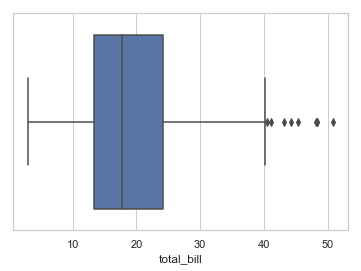

In [30]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [31]:
q75, q25 = np.percentile(tips.total_bill, [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

In [32]:
tips.total_bill[tips.total_bill > max]

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

In [33]:
tips.total_bill[tips.total_bill < max]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
5      25.29
6       8.77
7      26.88
8      15.04
9      14.78
10     10.27
11     35.26
12     15.42
13     18.43
14     14.83
15     21.58
16     10.33
17     16.29
18     16.97
19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
24     19.82
25     17.81
26     13.37
27     12.69
28     21.70
29     19.65
       ...  
214    28.17
215    12.90
216    28.15
217    11.59
218     7.74
219    30.14
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
227    20.45
228    13.28
229    22.12
230    24.01
231    15.69
232    11.61
233    10.77
234    15.53
235    10.07
236    12.60
237    32.83
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 235, dtype: float64